评分卡打出的分数越高，客户的信用越好，风险越小。以个人消费类贷款款数据为例，进行A卡的建模和制作。

## 一、导库，获取数据

In [1]:
%matplotlib inline
import scipy #用于分箱过程的卡方检验
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scikitplot as skplt #ROC曲线
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression as LR
from imblearn.over_sampling import SMOTE #处理样本不平衡问题，上采样over_sampling的SMOTE方法

In [2]:
data = pd.read_csv("02rankingcard.csv",index_col=0)

## 二、探索数据与数据预处理

In [3]:
data.columns = ['出现90天或更长时间的逾期行为（定义好坏客户）','贷款以及信用卡可用额度与总额度比例','借款人借款年龄','过去两年内出现35-59天逾期但是没有发展得更坏的次数','每月偿还债务，赡养费，生活费用除以月总收入','月收入','开放式贷款和信贷数量','过去两年内出现90天逾期或更坏的次数','抵押贷款和房地产贷款数量，包括房屋净值信贷额度','过去两年内出现60-89天逾期但是没有发展得更坏的次数','家庭中不包括自身的家属人数（配偶、子女等）']

In [4]:
data.head() #第一列是标签

,出现90天或更长时间的逾期行为（定义好坏客户）,贷款以及信用卡可用额度与总额度比例,借款人借款年龄,过去两年内出现35-59天逾期但是没有发展得更坏的次数,每月偿还债务，赡养费，生活费用除以月总收入,月收入,开放式贷款和信贷数量,过去两年内出现90天逾期或更坏的次数,抵押贷款和房地产贷款数量，包括房屋净值信贷额度,过去两年内出现60-89天逾期但是没有发展得更坏的次数,家庭中不包括自身的家属人数（配偶、子女等）
1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [5]:
data.shape

(150000, 11)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150000 entries, 1 to 150000
Data columns (total 11 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   出现90天或更长时间的逾期行为（定义好坏客户）      150000 non-null  int64  
 1   贷款以及信用卡可用额度与总额度比例            150000 non-null  float64
 2   借款人借款年龄                      150000 non-null  int64  
 3   过去两年内出现35-59天逾期但是没有发展得更坏的次数  150000 non-null  int64  
 4   每月偿还债务，赡养费，生活费用除以月总收入        150000 non-null  float64
 5   月收入                          120269 non-null  float64
 6   开放式贷款和信贷数量                   150000 non-null  int64  
 7   过去两年内出现90天逾期或更坏的次数           150000 non-null  int64  
 8   抵押贷款和房地产贷款数量，包括房屋净值信贷额度      150000 non-null  int64  
 9   过去两年内出现60-89天逾期但是没有发展得更坏的次数  150000 non-null  int64  
 10  家庭中不包括自身的家属人数（配偶、子女等）        146076 non-null  float64
dtypes: float64(4), int64(7)
memory usage: 13.7 MB


### （一）去除重复值

In [7]:
data.drop_duplicates(inplace=True) #去除重复值，替换原数据
data.index = range(data.shape[0]) #恢复索引
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149391 entries, 0 to 149390
Data columns (total 11 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   出现90天或更长时间的逾期行为（定义好坏客户）      149391 non-null  int64  
 1   贷款以及信用卡可用额度与总额度比例            149391 non-null  float64
 2   借款人借款年龄                      149391 non-null  int64  
 3   过去两年内出现35-59天逾期但是没有发展得更坏的次数  149391 non-null  int64  
 4   每月偿还债务，赡养费，生活费用除以月总收入        149391 non-null  float64
 5   月收入                          120170 non-null  float64
 6   开放式贷款和信贷数量                   149391 non-null  int64  
 7   过去两年内出现90天逾期或更坏的次数           149391 non-null  int64  
 8   抵押贷款和房地产贷款数量，包括房屋净值信贷额度      149391 non-null  int64  
 9   过去两年内出现60-89天逾期但是没有发展得更坏的次数  149391 non-null  int64  
 10  家庭中不包括自身的家属人数（配偶、子女等）        145563 non-null  float64
dtypes: float64(4), int64(7)
memory usage: 12.5 MB


### （二）填补缺失值

In [8]:
data.isnull().sum() #每个特征中空值的数目

出现90天或更长时间的逾期行为（定义好坏客户）            0
贷款以及信用卡可用额度与总额度比例                  0
借款人借款年龄                            0
过去两年内出现35-59天逾期但是没有发展得更坏的次数        0
每月偿还债务，赡养费，生活费用除以月总收入              0
月收入                            29221
开放式贷款和信贷数量                         0
过去两年内出现90天逾期或更坏的次数                 0
抵押贷款和房地产贷款数量，包括房屋净值信贷额度            0
过去两年内出现60-89天逾期但是没有发展得更坏的次数        0
家庭中不包括自身的家属人数（配偶、子女等）           3828
dtype: int64

In [9]:
data.isnull().sum()/data.shape[0] #每个特征中空值的比例（方法1）

出现90天或更长时间的逾期行为（定义好坏客户）        0.000000
贷款以及信用卡可用额度与总额度比例              0.000000
借款人借款年龄                        0.000000
过去两年内出现35-59天逾期但是没有发展得更坏的次数    0.000000
每月偿还债务，赡养费，生活费用除以月总收入          0.000000
月收入                            0.195601
开放式贷款和信贷数量                     0.000000
过去两年内出现90天逾期或更坏的次数             0.000000
抵押贷款和房地产贷款数量，包括房屋净值信贷额度        0.000000
过去两年内出现60-89天逾期但是没有发展得更坏的次数    0.000000
家庭中不包括自身的家属人数（配偶、子女等）          0.025624
dtype: float64

In [10]:
data.isnull().mean() #每个特征中空值的比例（方法2）

出现90天或更长时间的逾期行为（定义好坏客户）        0.000000
贷款以及信用卡可用额度与总额度比例              0.000000
借款人借款年龄                        0.000000
过去两年内出现35-59天逾期但是没有发展得更坏的次数    0.000000
每月偿还债务，赡养费，生活费用除以月总收入          0.000000
月收入                            0.195601
开放式贷款和信贷数量                     0.000000
过去两年内出现90天逾期或更坏的次数             0.000000
抵押贷款和房地产贷款数量，包括房屋净值信贷额度        0.000000
过去两年内出现60-89天逾期但是没有发展得更坏的次数    0.000000
家庭中不包括自身的家属人数（配偶、子女等）          0.025624
dtype: float64

#### 1.使用均值填补家属人数

In [11]:
data['家庭中不包括自身的家属人数（配偶、子女等）'].fillna(int(data['家庭中不包括自身的家属人数（配偶、子女等）'].mean()),inplace=True)
data.isnull().mean()

出现90天或更长时间的逾期行为（定义好坏客户）        0.000000
贷款以及信用卡可用额度与总额度比例              0.000000
借款人借款年龄                        0.000000
过去两年内出现35-59天逾期但是没有发展得更坏的次数    0.000000
每月偿还债务，赡养费，生活费用除以月总收入          0.000000
月收入                            0.195601
开放式贷款和信贷数量                     0.000000
过去两年内出现90天逾期或更坏的次数             0.000000
抵押贷款和房地产贷款数量，包括房屋净值信贷额度        0.000000
过去两年内出现60-89天逾期但是没有发展得更坏的次数    0.000000
家庭中不包括自身的家属人数（配偶、子女等）          0.000000
dtype: float64

#### 2.使用随机森林填补月收入

月收入**不缺失**的数据是**训练集**，月收入**缺失**的数据是**测试集**。<br>
月收入（不缺失）：Y_train；<br>
月收入（缺失）：Y_test；<br>
除月收入（不缺失）的其他特征+标签：X_train；<br>
除月收入（缺失）的其他特征+标签：X_test。<br>
填补月收入缺失数据：预测Y_test。

In [12]:
def fill_missing_rf(X,y,to_fill):
    
    '''
    使用随机森林填补一个特征的缺失值的函数。
    
    参数：
    X：原数据特征矩阵（有一列有缺失值）
    y：原数据标签（没有缺失值）
    to_fill：原数据特征矩阵中有缺失值的列名
    '''
    #构建新特征矩阵和新标签
    df = X.copy()
    y_ = df.loc[:,to_fill] #有缺失的列（新标签）
    X_ = pd.concat([df.loc[:,df.columns != to_fill],pd.DataFrame(y)], axis=1) #除有缺失的列的其他特征+标签（新特征矩阵）
    
    #训练集和测试集
    Ytrain = y_[y_.notnull()]
    Ytest = y_[y_.isnull()]
    Xtrain = X_.iloc[Ytrain.index,:]
    Xtest = X_.iloc[Ytest.index,:]
    
    #用随机森林填补缺失值
    from sklearn.ensemble import RandomForestRegressor as rfr
    rfr = rfr(n_estimators=100)
    rfr = rfr.fit(Xtrain,Ytrain)
    Ypredict = rfr.predict(Xtest)
    
    return Ypredict

In [13]:
X = data.iloc[:,1:]
y = data.iloc[:,0]
y_pred = fill_missing_rf(X,y,'月收入')
data.loc[data.loc[:,'月收入'].isnull(),'月收入'] = y_pred
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149391 entries, 0 to 149390
Data columns (total 11 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   出现90天或更长时间的逾期行为（定义好坏客户）      149391 non-null  int64  
 1   贷款以及信用卡可用额度与总额度比例            149391 non-null  float64
 2   借款人借款年龄                      149391 non-null  int64  
 3   过去两年内出现35-59天逾期但是没有发展得更坏的次数  149391 non-null  int64  
 4   每月偿还债务，赡养费，生活费用除以月总收入        149391 non-null  float64
 5   月收入                          149391 non-null  float64
 6   开放式贷款和信贷数量                   149391 non-null  int64  
 7   过去两年内出现90天逾期或更坏的次数           149391 non-null  int64  
 8   抵押贷款和房地产贷款数量，包括房屋净值信贷额度      149391 non-null  int64  
 9   过去两年内出现60-89天逾期但是没有发展得更坏的次数  149391 non-null  int64  
 10  家庭中不包括自身的家属人数（配偶、子女等）        149391 non-null  float64
dtypes: float64(4), int64(7)
memory usage: 12.5 MB


#### 3.描述性统计处理异常值

In [14]:
data.describe([0.01,0.1,0.25,0.5,0.75,0.9,0.99]).T #返回这些分位数

,count,mean,std,min,1%,10%,25%,50%,75%,90%,99%,max
出现90天或更长时间的逾期行为（定义好坏客户）,149391.0,0.066999,0.250021,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.0
贷款以及信用卡可用额度与总额度比例,149391.0,6.071087,250.263672,0.0,0.0,0.003199,0.030132,0.154235,0.556494,0.978007,1.093922,50708.0
借款人借款年龄,149391.0,52.306237,14.725962,0.0,24.0,33.000000,41.000000,52.000000,63.000000,72.000000,87.000000,109.0
过去两年内出现35-59天逾期但是没有发展得更坏的次数,149391.0,0.393886,3.852953,0.0,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,4.000000,98.0
每月偿还债务，赡养费，生活费用除以月总收入,149391.0,354.436740,2041.843455,0.0,0.0,0.034991,0.177441,0.368234,0.875279,1275.000000,4985.100000,329664.0
月收入,149391.0,5425.751276,13256.096397,0.0,0.0,0.170000,1800.000000,4417.000000,7416.000000,10800.000000,23250.000000,3008750.0
开放式贷款和信贷数量,149391.0,8.480892,5.136515,0.0,0.0,3.000000,5.000000,8.000000,11.000000,15.000000,24.000000,58.0
过去两年内出现90天逾期或更坏的次数,149391.0,0.238120,3.826165,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,98.0
抵押贷款和房地产贷款数量，包括房屋净值信贷额度,149391.0,1.022391,1.130196,0.0,0.0,0.000000,0.000000,1.000000,2.000000,2.000000,4.000000,54.0
过去两年内出现60-89天逾期但是没有发展得更坏的次数,149391.0,0.212503,3.810523,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,98.0


（1）年龄：最小值0

In [15]:
#年龄的最小值是0，有1个人
(data['借款人借款年龄']==0).sum()

1

In [16]:
data = data[data['借款人借款年龄'] != 0]
data.shape

(149390, 11)

In [17]:
data.describe([0.01,0.1,0.25,0.5,0.75,0.9,0.99]).T #年龄最小值是21

,count,mean,std,min,1%,10%,25%,50%,75%,90%,99%,max
出现90天或更长时间的逾期行为（定义好坏客户）,149390.0,0.066999,0.250021,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.0
贷款以及信用卡可用额度与总额度比例,149390.0,6.071121,250.264509,0.0,0.0,0.003199,0.030132,0.154234,0.556491,0.978007,1.093923,50708.0
借款人借款年龄,149390.0,52.306587,14.725390,21.0,24.0,33.000000,41.000000,52.000000,63.000000,72.000000,87.000000,109.0
过去两年内出现35-59天逾期但是没有发展得更坏的次数,149390.0,0.393882,3.852966,0.0,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,4.000000,98.0
每月偿还债务，赡养费，生活费用除以月总收入,149390.0,354.439110,2041.850084,0.0,0.0,0.034991,0.177441,0.368233,0.875294,1275.000000,4985.110000,329664.0
月收入,149390.0,5425.747432,13256.140682,0.0,0.0,0.170000,1800.000000,4417.000000,7416.000000,10800.000000,23250.000000,3008750.0
开放式贷款和信贷数量,149390.0,8.480909,5.136528,0.0,0.0,3.000000,5.000000,8.000000,11.000000,15.000000,24.000000,58.0
过去两年内出现90天逾期或更坏的次数,149390.0,0.238122,3.826177,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,98.0
抵押贷款和房地产贷款数量，包括房屋净值信贷额度,149390.0,1.022384,1.130196,0.0,0.0,0.000000,0.000000,1.000000,2.000000,2.000000,4.000000,54.0
过去两年内出现60-89天逾期但是没有发展得更坏的次数,149390.0,0.212504,3.810536,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,98.0


（2）过去两年内出现35-59天逾期但是没有发展得更坏的次数，过去两年内出现60-89天逾期但是没有发展得更坏的次数，过去两年内出现90天逾期或更坏的次数：最大值98

In [18]:
data[data.loc[:,'过去两年内出现90天逾期或更坏的次数']>90] #标签不全是1

,出现90天或更长时间的逾期行为（定义好坏客户）,贷款以及信用卡可用额度与总额度比例,借款人借款年龄,过去两年内出现35-59天逾期但是没有发展得更坏的次数,每月偿还债务，赡养费，生活费用除以月总收入,月收入,开放式贷款和信贷数量,过去两年内出现90天逾期或更坏的次数,抵押贷款和房地产贷款数量，包括房屋净值信贷额度,过去两年内出现60-89天逾期但是没有发展得更坏的次数,家庭中不包括自身的家属人数（配偶、子女等）
1732,1,1.0,27,98,0.0,2700.000000,0,98,0,98,0.0
2285,0,1.0,22,98,0.0,1486.641470,0,98,0,98,0.0
3883,0,1.0,38,98,12.0,2771.090000,0,98,0,98,0.0
4416,0,1.0,21,98,0.0,0.000000,0,98,0,98,0.0
4704,0,1.0,21,98,0.0,2000.000000,0,98,0,98,0.0
...,...,...,...,...,...,...,...,...,...,...,...
146667,1,1.0,25,98,0.0,1963.613512,0,98,0,98,0.0
147180,1,1.0,68,98,255.0,12.210000,0,98,0,98,0.0
148548,1,1.0,24,98,54.0,837.110000,0,98,0,98,0.0
148634,0,1.0,26,98,0.0,2000.000000,0,98,0,98,0.0


In [19]:
data.loc[:,'过去两年内出现90天逾期或更坏的次数'].value_counts() #98和96是异常值

0     141107
1       5232
2       1555
3        667
4        291
98       220
5        131
6         80
7         38
8         21
9         19
10         8
11         5
96         5
13         4
12         2
14         2
15         2
17         1
Name: 过去两年内出现90天逾期或更坏的次数, dtype: int64

In [20]:
data = data[data.loc[:,'过去两年内出现90天逾期或更坏的次数']<90] #删除98和96的数据
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 149165 entries, 0 to 149390
Data columns (total 11 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   出现90天或更长时间的逾期行为（定义好坏客户）      149165 non-null  int64  
 1   贷款以及信用卡可用额度与总额度比例            149165 non-null  float64
 2   借款人借款年龄                      149165 non-null  int64  
 3   过去两年内出现35-59天逾期但是没有发展得更坏的次数  149165 non-null  int64  
 4   每月偿还债务，赡养费，生活费用除以月总收入        149165 non-null  float64
 5   月收入                          149165 non-null  float64
 6   开放式贷款和信贷数量                   149165 non-null  int64  
 7   过去两年内出现90天逾期或更坏的次数           149165 non-null  int64  
 8   抵押贷款和房地产贷款数量，包括房屋净值信贷额度      149165 non-null  int64  
 9   过去两年内出现60-89天逾期但是没有发展得更坏的次数  149165 non-null  int64  
 10  家庭中不包括自身的家属人数（配偶、子女等）        149165 non-null  float64
dtypes: float64(4), int64(7)
memory usage: 13.7 MB


In [21]:
#恢复索引
data.index = range(data.shape[0])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149165 entries, 0 to 149164
Data columns (total 11 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   出现90天或更长时间的逾期行为（定义好坏客户）      149165 non-null  int64  
 1   贷款以及信用卡可用额度与总额度比例            149165 non-null  float64
 2   借款人借款年龄                      149165 non-null  int64  
 3   过去两年内出现35-59天逾期但是没有发展得更坏的次数  149165 non-null  int64  
 4   每月偿还债务，赡养费，生活费用除以月总收入        149165 non-null  float64
 5   月收入                          149165 non-null  float64
 6   开放式贷款和信贷数量                   149165 non-null  int64  
 7   过去两年内出现90天逾期或更坏的次数           149165 non-null  int64  
 8   抵押贷款和房地产贷款数量，包括房屋净值信贷额度      149165 non-null  int64  
 9   过去两年内出现60-89天逾期但是没有发展得更坏的次数  149165 non-null  int64  
 10  家庭中不包括自身的家属人数（配偶、子女等）        149165 non-null  float64
dtypes: float64(4), int64(7)
memory usage: 12.5 MB


#### 4.不统一量纲，不标准化数据分布

统计结果变漂亮了，但业务人员不好理解。

#### 5.样本不均衡问题：使用上采样方法(`imblearn.over_sampling`)平衡样本

In [22]:
X = data.iloc[:,1:]
y = data.iloc[:,0]
y.value_counts()

0    139292
1      9873
Name: 出现90天或更长时间的逾期行为（定义好坏客户）, dtype: int64

In [23]:
print('样本个数：{}；1占{:.2%}；0占{:.2%}'.format(y.shape[0],y.value_counts()[1]/y.shape[0],y.value_counts()[0]/y.shape[0]))

样本个数：149165；1占6.62%；0占93.38%


In [24]:
sm = SMOTE(random_state=42) #实例化
X,y = sm.fit_resample(X,y)

In [25]:
X.shape

(278584, 10)

In [26]:
y.shape

(278584,)

In [27]:
y.value_counts()

1    139292
0    139292
Name: 出现90天或更长时间的逾期行为（定义好坏客户）, dtype: int64

In [28]:
print('样本个数：{}；1占{:.2%}；0占{:.2%}'.format(y.shape[0],y.value_counts()[1]/y.shape[0],y.value_counts()[0]/y.shape[0]))

样本个数：278584；1占50.00%；0占50.00%


#### 6.分训练集和测试集

In [29]:
X_train, X_vali, Y_train, Y_vali = train_test_split(X,y,test_size=0.3,random_state=420)

model_data = pd.concat([Y_train, X_train], axis=1) #逻辑回归要把特征矩阵和标签合并
model_data.index = range(model_data.shape[0]) #重置索引

vali_data = pd.concat([Y_vali, X_vali], axis=1)
vali_data.index = range(vali_data.shape[0]) #重置索引

model_data.to_csv("02model_data.csv", encoding = 'utf-8-sig') #训练集
vali_data.to_csv("02vali_data.csv", encoding = 'utf-8-sig') #验证集

## 三、分箱

#### 分多少个箱子才合适

$$InformationValue：IV = \sum_{i=0}^{N}(good\%-bad\%)*WOE_i$$

$$证据权重WOE_i = ln(\frac {good\%}{bad\%})$$

**IV**|**特征对预测函数的贡献**
-|-
<0.03|特征几乎不带有效信息，对模型没有贡献，这种特征可以被删除
0.03-0.09|有效信息很少，对模型的贡献度低
0.1-0.29|有效信息一般，对模型的贡献度中等
0.3-0.49|有效信息较多，对模型的贡献度较高
\>=0.5|有效信息非常多，对模型的贡献超高并且可疑

#### 分箱要达成什么样的效果

在同一个箱子内的人的属性是尽量相似的，不同箱子的人的属性是尽量不同的，即“组间差异大，组内差异小”。可以使用**卡方检验**来对比两个箱子之间的相似性。

#### 分箱的步骤

1）首先把连续型变量分成一组数量较多的**分类型变量**，比如，将几万个样本分成100组，或50组；<br>
2）确保每一组中都要**包含两种类别的样本**，否则IV值会无法计算；<br>
3）对相邻的组进行**卡方检验**，卡方检验的**P值很大**的组进行合并，直到数据中的组数小于设定的N箱为止；<br>
4）让一个特征分别分成[2,3,4.....20]箱，观察每个分箱个数下的IV值如何变化，找出最适合的分箱个数；<br>
5）分箱完毕后，计算每个箱的WOE值，bad%，观察分箱效果；<br>
这些步骤都完成后，可以对各个特征都进行分箱，然后观察每个特征的IV值，以此来挑选特征。

### （一）等频分箱

#### 1.分箱

In [30]:
model_data['qcut'],updown = pd.qcut(model_data['借款人借款年龄'],retbins=True,q=20) #自动生成新列qcut，分成20箱

In [31]:
model_data.head()

,出现90天或更长时间的逾期行为（定义好坏客户）,贷款以及信用卡可用额度与总额度比例,借款人借款年龄,过去两年内出现35-59天逾期但是没有发展得更坏的次数,每月偿还债务，赡养费，生活费用除以月总收入,月收入,开放式贷款和信贷数量,过去两年内出现90天逾期或更坏的次数,抵押贷款和房地产贷款数量，包括房屋净值信贷额度,过去两年内出现60-89天逾期但是没有发展得更坏的次数,家庭中不包括自身的家属人数（配偶、子女等）,qcut
0,0,0.015404,53,0,0.121802,4728.0,5,0,0,0,0.000000,"(52.0, 54.0]"
1,0,0.168311,63,0,0.141964,1119.0,5,0,0,0,0.000000,"(61.0, 64.0]"
2,1,1.063570,39,1,0.417663,3500.0,5,1,0,2,3.716057,"(36.0, 39.0]"
3,0,0.088684,73,0,0.522822,5301.0,11,0,2,0,0.000000,"(68.0, 74.0]"
4,1,0.622999,53,0,0.423650,13000.0,9,0,2,0,0.181999,"(52.0, 54.0]"


In [32]:
model_data['qcut'].value_counts()

(36.0, 39.0]      12649
(20.999, 28.0]    11734
(58.0, 61.0]      11378
(48.0, 50.0]      11107
(46.0, 48.0]      10990
(31.0, 34.0]      10835
(50.0, 52.0]      10522
(43.0, 45.0]      10343
(61.0, 64.0]      10166
(39.0, 41.0]       9794
(52.0, 54.0]       9756
(41.0, 43.0]       9691
(28.0, 31.0]       9543
(74.0, 107.0]      9111
(64.0, 68.0]       8903
(54.0, 56.0]       8702
(68.0, 74.0]       8657
(56.0, 58.0]       7908
(34.0, 36.0]       7517
(45.0, 46.0]       5702
Name: qcut, dtype: int64

In [33]:
updown

array([ 21.,  28.,  31.,  34.,  36.,  39.,  41.,  43.,  45.,  46.,  48.,
        50.,  52.,  54.,  56.,  58.,  61.,  64.,  68.,  74., 107.])

#### 2.每个箱中0和1的个数

In [34]:
count_y0 = model_data[model_data['出现90天或更长时间的逾期行为（定义好坏客户）']==0].groupby(by='qcut').count()['出现90天或更长时间的逾期行为（定义好坏客户）']
count_y0

qcut
(20.999, 28.0]    4243
(28.0, 31.0]      3571
(31.0, 34.0]      4075
(34.0, 36.0]      2908
(36.0, 39.0]      5182
(39.0, 41.0]      3956
(41.0, 43.0]      4002
(43.0, 45.0]      4389
(45.0, 46.0]      2419
(46.0, 48.0]      4813
(48.0, 50.0]      4900
(50.0, 52.0]      4728
(52.0, 54.0]      4681
(54.0, 56.0]      4677
(56.0, 58.0]      4483
(58.0, 61.0]      6583
(61.0, 64.0]      6968
(64.0, 68.0]      6623
(68.0, 74.0]      6753
(74.0, 107.0]     7737
Name: 出现90天或更长时间的逾期行为（定义好坏客户）, dtype: int64

In [35]:
count_y1 = model_data[model_data['出现90天或更长时间的逾期行为（定义好坏客户）']==1].groupby(by='qcut').count()['出现90天或更长时间的逾期行为（定义好坏客户）']
count_y1

qcut
(20.999, 28.0]    7491
(28.0, 31.0]      5972
(31.0, 34.0]      6760
(34.0, 36.0]      4609
(36.0, 39.0]      7467
(39.0, 41.0]      5838
(41.0, 43.0]      5689
(43.0, 45.0]      5954
(45.0, 46.0]      3283
(46.0, 48.0]      6177
(48.0, 50.0]      6207
(50.0, 52.0]      5794
(52.0, 54.0]      5075
(54.0, 56.0]      4025
(56.0, 58.0]      3425
(58.0, 61.0]      4795
(61.0, 64.0]      3198
(64.0, 68.0]      2280
(68.0, 74.0]      1904
(74.0, 107.0]     1374
Name: 出现90天或更长时间的逾期行为（定义好坏客户）, dtype: int64

In [36]:
num_bins = [*zip(updown,updown[1:],count_y0,count_y1)] #zip会按照最短列updown[1:]结合
num_bins

[(21.0, 28.0, 4243, 7491),
 (28.0, 31.0, 3571, 5972),
 (31.0, 34.0, 4075, 6760),
 (34.0, 36.0, 2908, 4609),
 (36.0, 39.0, 5182, 7467),
 (39.0, 41.0, 3956, 5838),
 (41.0, 43.0, 4002, 5689),
 (43.0, 45.0, 4389, 5954),
 (45.0, 46.0, 2419, 3283),
 (46.0, 48.0, 4813, 6177),
 (48.0, 50.0, 4900, 6207),
 (50.0, 52.0, 4728, 5794),
 (52.0, 54.0, 4681, 5075),
 (54.0, 56.0, 4677, 4025),
 (56.0, 58.0, 4483, 3425),
 (58.0, 61.0, 6583, 4795),
 (61.0, 64.0, 6968, 3198),
 (64.0, 68.0, 6623, 2280),
 (68.0, 74.0, 6753, 1904),
 (74.0, 107.0, 7737, 1374)]

### （二）确保每个箱中都有0和1

In [37]:
for i in range(20):
    #如果第一个组没有包含正样本或负样本，向后合并
    if 0 in num_bins[0][2:]:
        num_bins[0:2] = [(num_bins[0][0],
                          num_bins[1][1],
                          num_bins[0][2]+num_bins[1][2],
                          num_bins[0][3]+num_bins[1][3])]
        continue
    """
    合并了之后，第一行的组是否一定有两种样本了呢？不一定
    如果原本的第一组和第二组都没有包含正样本，或者都没有包含负样本，那即便合并之后，第一行的组也还是没有包含两种样本
    所以我们在每次合并完毕之后，还需要再检查，第一组是否已经包含了两种样本
    这里使用continue跳出了本次循环，开始下一次循环，所以回到了最开始的for i in range(20), 让i+1
    这就跳过了下面的代码，又从头开始检查，第一组是否包含了两种样本
    如果第一组中依然没有包含两种样本，则if通过，继续合并，每合并一次就会循环检查一次，最多合并20次
    如果第一组中已经包含两种样本，则if不通过，就开始执行下面的代码
    """
    #已经确认第一组中肯定包含两种样本了，如果其他组没有包含两种样本，就向前合并
    #此时的num_bins已经被上面的代码处理过，可能被合并过，也可能没有被合并
    #但无论如何，我们要在num_bins中遍历，所以写成in range(len(num_bins))
    for i in range(len(num_bins)):
        if 0 in num_bins[i][2:]:
            num_bins[i-1:i+1] = [(num_bins[i-1][0],
                                  num_bins[i][1],
                                  num_bins[i-1][2]+num_bins[i][2],
                                  num_bins[i-1][3]+num_bins[i][3])]
            break
        #如果对第一组和对后面所有组的判断中，都没有进入if去合并，则提前结束所有的循环
    else:
        break
    """
    这个break，只有在if被满足的条件下才会被触发
    也就是说，只有发生了合并，才会打断for i in range(len(num_bins))这个循环
    为什么要打断这个循环？因为我们是在range(len(num_bins))中遍历
    但合并发生后，len(num_bins)发生了改变，但循环却不会重新开始
    举个例子，本来num_bins是5组，for i in range(len(num_bins))在第一次运行的时候就等于for i inrange(5)
    range中输入的变量会被转换为数字，不会跟着num_bins的变化而变化，所以i会永远在[0,1,2,3,4]中遍历
    进行合并后，num_bins变成了4组，已经不存在=4的索引了，但i却依然会取到4，循环就会报错
    因此在这里，一旦if被触发，即一旦合并发生，我们就让循环被破坏，使用break跳出当前循环
    循环就会回到最开始的for i in range(20)中
    此时判断第一组是否有两种标签的代码不会被触发，但for i in range(len(num_bins))却会被重新运行
    这样就更新了i的取值，循环就不会报错了
    """

### （三）定义WOE和IV函数

bad rate是某箱中的坏样本占**该箱样本**的比例，bad%是某箱中的坏样本占**所有坏样本**的比例。

In [38]:
def get_woe(num_bins):
    columns = ["min","max","count_0","count_1"]
    df = pd.DataFrame(num_bins,columns=columns)
    df['total'] = df['count_0']+df['count_1'] #一个箱子中的样本总数
    df['percentage'] = df['total']/df['total'].sum() #一个箱子中的样本总数占所有样本的比例
    df['bad_rate'] = df['count_1']/df['total'] #一个箱子中坏样本占该箱子样本数的比例
    df['good%'] = df['count_0']/df['count_0'].sum() #一个箱子中好样本占所有好样本的比例
    df['bad%'] = df['count_1']/df['count_1'].sum() #一个箱子中坏样本占所有坏样本的比例
    df['woe'] = np.log(df['good%']/df['bad%'])
    return df

def get_iv(df):
    iv = np.sum((df['good%']-df['bad%'])*df['woe'])
    return iv

### （四）卡方检验，合并箱体，画出IV曲线，确定最佳分箱个数

In [39]:
num_bins_ = num_bins.copy()

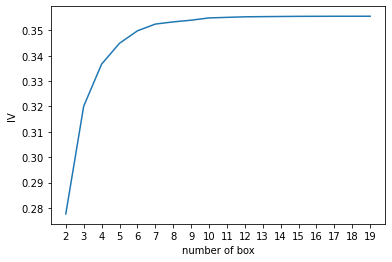

In [40]:
axisx = [] #分箱的个数，x轴
IV = [] #IV值，y轴

while len(num_bins_) > 2: #合并到2箱停止
    pvs = [] #存放两两之间的卡方检验的p值
    for i in range(len(num_bins_)-1):
        x1 = num_bins_[i][2:]
        x2 = num_bins_[i+1][2:]
        #0返回chi2值，1返回p值
        pv = scipy.stats.chi2_contingency([x1,x2])[1]
        #chi2 = scipy.stats.chi2_contingency([x1,x2])[0]
        pvs.append(pv)

    i = pvs.index(max(pvs)) #p值最大的索引
    #合并p值最大的两组
    num_bins_[i:i+2] = [(num_bins_[i][0],
                         num_bins_[i+1][1],
                         num_bins_[i][2]+num_bins_[i+1][2],
                         num_bins_[i][3]+num_bins_[i+1][3])]

    bins_df = get_woe(num_bins_)
    axisx.append(len(num_bins_))
    IV.append(get_iv(bins_df))

#画图
plt.figure()
plt.plot(axisx,IV)
plt.xticks(axisx)
plt.xlabel("number of box")
plt.ylabel("IV")
plt.show()

年龄最佳分箱数为6，即下一步的n=6。

### （五）用最佳分箱个数分箱，并验证分箱结果

In [41]:
def get_bin(num_bins_,n): #可以输入最佳分箱个数
    while len(num_bins_) > n:
        pvs = []
        for i in range(len(num_bins_)-1):
            x1 = num_bins_[i][2:]
            x2 = num_bins_[i+1][2:]
            pv = scipy.stats.chi2_contingency([x1,x2])[1]
            #chi2 = scipy.stats.chi2_contingency([x1,x2])[0]
            pvs.append(pv)
        i = pvs.index(max(pvs))
        num_bins_[i:i+2] = [(num_bins_[i][0],
                             num_bins_[i+1][1],
                             num_bins_[i][2]+num_bins_[i+1][2],
                             num_bins_[i][3]+num_bins_[i+1][3])]
    return num_bins_

In [42]:
afterbins = get_bin(num_bins,6)
afterbins

[(21.0, 36.0, 14797, 24832),
 (36.0, 54.0, 39070, 51484),
 (54.0, 61.0, 15743, 12245),
 (61.0, 64.0, 6968, 3198),
 (64.0, 74.0, 13376, 4184),
 (74.0, 107.0, 7737, 1374)]

In [43]:
bins_df = get_woe(num_bins) #希望各箱之间的bad_rate差异较大，且woe单调或只有一个转折点
bins_df

,min,max,count_0,count_1,total,percentage,bad_rate,good%,bad%,woe
0,21.0,36.0,14797,24832,39629,0.203217,0.626612,0.151467,0.255166,-0.521544
1,36.0,54.0,39070,51484,90554,0.464360,0.568545,0.399934,0.529034,-0.279752
2,54.0,61.0,15743,12245,27988,0.143522,0.437509,0.161151,0.125826,0.247442
3,61.0,64.0,6968,3198,10166,0.052131,0.314578,0.071327,0.032862,0.774967
4,64.0,74.0,13376,4184,17560,0.090048,0.238269,0.136922,0.042994,1.158359
5,74.0,107.0,7737,1374,9111,0.046721,0.150807,0.079199,0.014119,1.724452


索引为0和2的bad_rate相近，但是改成5组依然存在相近的组，因此保持6组。

### （六）将选取最佳分箱个数的过程包装为函数

In [44]:
def graphforbestbin(DF, X, Y, n=5, q=20, graph=True):
    """
    自动最优分箱函数，基于卡方检验的分箱
    参数：
    DF: 需要输入的数据
    X: 需要分箱的列名
    Y: 分箱数据对应的标签Y列名
    n: 保留分箱个数
    q: 初始分箱的个数
    graph: 是否要画出IV图像
    区间为前开后闭 (]
    """
    DF = DF[[X,Y]].copy()
    
    DF["qcut"],bins = pd.qcut(DF[X], retbins=True, q=q,duplicates="drop")
    coount_y0 = DF.loc[DF[Y]==0].groupby(by="qcut").count()[Y]
    coount_y1 = DF.loc[DF[Y]==1].groupby(by="qcut").count()[Y]
    num_bins = [*zip(bins,bins[1:],coount_y0,coount_y1)]
    
    for i in range(q):
        if 0 in num_bins[0][2:]:
            num_bins[0:2] = [(num_bins[0][0],
                              num_bins[1][1],
                              num_bins[0][2]+num_bins[1][2],
                              num_bins[0][3]+num_bins[1][3])]
            continue
            
        for i in range(len(num_bins)):
            if 0 in num_bins[i][2:]:
                num_bins[i-1:i+1] = [(num_bins[i-1][0],
                                      num_bins[i][1],
                                      num_bins[i-1][2]+num_bins[i][2],
                                      num_bins[i-1][3]+num_bins[i][3])]
                break
        else:
            break
    
    def get_woe(num_bins):
        columns = ["min","max","count_0","count_1"]
        df = pd.DataFrame(num_bins,columns=columns)
        df["total"] = df.count_0 + df.count_1
        df["percentage"] = df.total / df.total.sum()
        df["bad_rate"] = df.count_1 / df.total
        df["good%"] = df.count_0/df.count_0.sum()
        df["bad%"] = df.count_1/df.count_1.sum()
        df["woe"] = np.log(df["good%"] / df["bad%"])
        return df
    
    def get_iv(df):
        rate = df["good%"] - df["bad%"]
        iv = np.sum(rate * df.woe)
        return iv
    
    IV = []
    axisx = []
    while len(num_bins) > n:
        pvs = []
        for i in range(len(num_bins)-1):
            x1 = num_bins[i][2:]
            x2 = num_bins[i+1][2:]
            pv = scipy.stats.chi2_contingency([x1,x2])[1]
            pvs.append(pv)
        
        i = pvs.index(max(pvs))
        num_bins[i:i+2] = [(num_bins[i][0],
                            num_bins[i+1][1],
                            num_bins[i][2]+num_bins[i+1][2],
                            num_bins[i][3]+num_bins[i+1][3])]
        
        global bins_df
        bins_df = pd.DataFrame(get_woe(num_bins))
        axisx.append(len(num_bins))
        IV.append(get_iv(bins_df))
    
    if graph:
        plt.figure()
        plt.plot(axisx,IV)
        plt.xticks(axisx)
        plt.xlabel("number of box")
        plt.ylabel("IV")
        plt.show()
    return bins_df

### （七）对所有特征进行分箱选择

In [45]:
model_data.columns

Index(['出现90天或更长时间的逾期行为（定义好坏客户）', '贷款以及信用卡可用额度与总额度比例', '借款人借款年龄',
       '过去两年内出现35-59天逾期但是没有发展得更坏的次数', '每月偿还债务，赡养费，生活费用除以月总收入', '月收入',
       '开放式贷款和信贷数量', '过去两年内出现90天逾期或更坏的次数', '抵押贷款和房地产贷款数量，包括房屋净值信贷额度',
       '过去两年内出现60-89天逾期但是没有发展得更坏的次数', '家庭中不包括自身的家属人数（配偶、子女等）', 'qcut'],
      dtype='object')

贷款以及信用卡可用额度与总额度比例


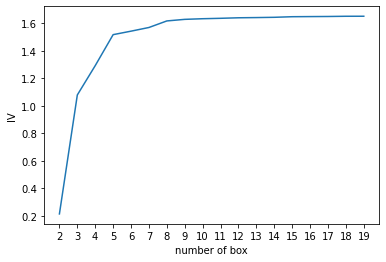

借款人借款年龄


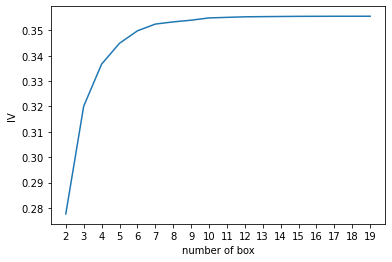

过去两年内出现35-59天逾期但是没有发展得更坏的次数


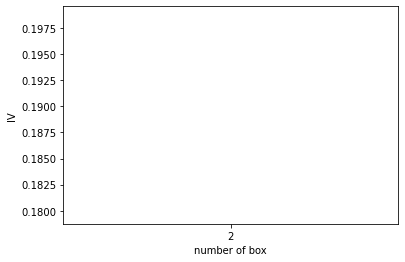

每月偿还债务，赡养费，生活费用除以月总收入


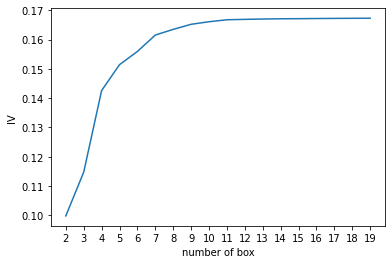

月收入


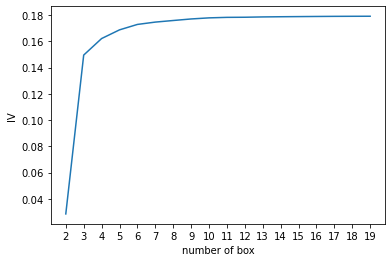

开放式贷款和信贷数量


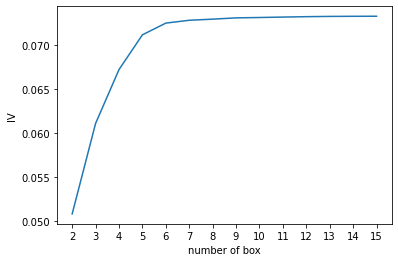

过去两年内出现90天逾期或更坏的次数


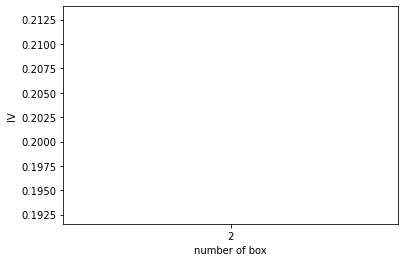

抵押贷款和房地产贷款数量，包括房屋净值信贷额度


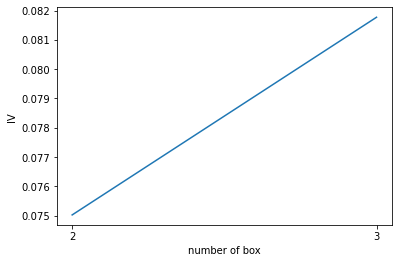

过去两年内出现60-89天逾期但是没有发展得更坏的次数


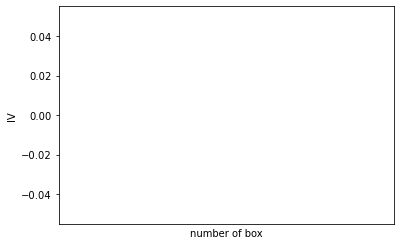

家庭中不包括自身的家属人数（配偶、子女等）


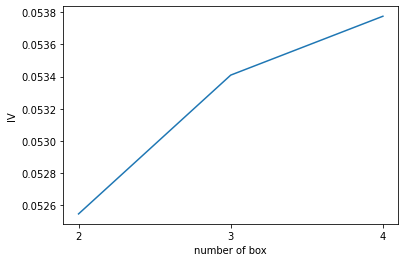

In [46]:
for i in model_data.columns[1:-1]:
    print(i)
    graphforbestbin(model_data,i,"出现90天或更长时间的逾期行为（定义好坏客户）",n=2,q=20)

不是所有的特征都可以使用这个分箱函数，比如说有的特征，像家人数量，就无法分出20组。于是将可以分箱的特征放出来单独分组，不能自动分箱的变量自己观察然后手写：

In [47]:
auto_col_bins = {"贷款以及信用卡可用额度与总额度比例":6,
                 "借款人借款年龄":5,
                 "每月偿还债务，赡养费，生活费用除以月总收入":4,
                 "月收入":3,
                 "开放式贷款和信贷数量":5}

#不能使用自动分箱的变量
hand_bins = {"过去两年内出现35-59天逾期但是没有发展得更坏的次数":[0,1,2,13]
            ,"过去两年内出现90天逾期或更坏的次数":[0,1,2,17]
            ,"抵押贷款和房地产贷款数量，包括房屋净值信贷额度":[0,1,2,4,54]
            ,"过去两年内出现60-89天逾期但是没有发展得更坏的次数":[0,1,2,8]
            ,"家庭中不包括自身的家属人数（配偶、子女等）":[0,1,2,3]}

#保证区间覆盖使用np.inf替换最大值，用-np.inf替换最小值
hand_bins = {k:[-np.inf,*v[:-1],np.inf] for k,v in hand_bins.items()}

对所有特征按照选择的箱体个数和手写的分箱范围进行分箱。

In [48]:
bins_of_col = {}
#生成自动分箱的分箱区间和分箱后的IV值
for col in auto_col_bins:
    bins_df = graphforbestbin(model_data,col
                             ,"出现90天或更长时间的逾期行为（定义好坏客户）"
                             ,n=auto_col_bins[col]
                             #使用字典的性质来取出每个特征所对应的箱的数量
                             ,q=20
                             ,graph=False)
    bins_list = sorted(set(bins_df["min"]).union(bins_df["max"]))
    #保证区间覆盖使用np.inf替换最大值，-np.inf替换最小值
    bins_list[0],bins_list[-1] = -np.inf,np.inf
    bins_of_col[col] = bins_list

bins_of_col

{'贷款以及信用卡可用额度与总额度比例': [-inf,
  0.09916994525,
  0.29807488197434456,
  0.46519198100000003,
  0.9824849283586309,
  0.9999998999999999,
  inf],
 '借款人借款年龄': [-inf, 36.0, 54.0, 61.0, 74.0, inf],
 '每月偿还债务，赡养费，生活费用除以月总收入': [-inf,
  0.017331961550000004,
  0.32053307000000003,
  1.4675535053900386,
  inf],
 '月收入': [-inf, 0.1, 5597.155725925674, inf],
 '开放式贷款和信贷数量': [-inf, 1.0, 3.0, 5.0, 17.0, inf]}

In [49]:
#合并手动分箱数据
bins_of_col.update(hand_bins)
bins_of_col

{'贷款以及信用卡可用额度与总额度比例': [-inf,
  0.09916994525,
  0.29807488197434456,
  0.46519198100000003,
  0.9824849283586309,
  0.9999998999999999,
  inf],
 '借款人借款年龄': [-inf, 36.0, 54.0, 61.0, 74.0, inf],
 '每月偿还债务，赡养费，生活费用除以月总收入': [-inf,
  0.017331961550000004,
  0.32053307000000003,
  1.4675535053900386,
  inf],
 '月收入': [-inf, 0.1, 5597.155725925674, inf],
 '开放式贷款和信贷数量': [-inf, 1.0, 3.0, 5.0, 17.0, inf],
 '过去两年内出现35-59天逾期但是没有发展得更坏的次数': [-inf, 0, 1, 2, inf],
 '过去两年内出现90天逾期或更坏的次数': [-inf, 0, 1, 2, inf],
 '抵押贷款和房地产贷款数量，包括房屋净值信贷额度': [-inf, 0, 1, 2, 4, inf],
 '过去两年内出现60-89天逾期但是没有发展得更坏的次数': [-inf, 0, 1, 2, inf],
 '家庭中不包括自身的家属人数（配偶、子女等）': [-inf, 0, 1, 2, inf]}

## 四、计算各箱的WOE并映射到数据中

计算各箱的WOE，并且把WOE替换到的原始数据model_data中，因为将使用WOE覆盖后的数据来建模，希望获取的是“各个箱”的分类结果，即评分卡上各个评分项目的分类结果。

In [50]:
data = model_data.copy()

#以年龄为例
data = data[["借款人借款年龄","出现90天或更长时间的逾期行为（定义好坏客户）"]].copy()
#函数pd.cut，可以根据已知的分箱间隔把数据分箱，参数为pd.cut(数据，以列表表示的分箱间隔)
data["cut"] = pd.cut(data["借款人借款年龄"],[-np.inf, 48.49986200790144, 58.757170160044694, 64.0, 74.0, np.inf])
data

,借款人借款年龄,出现90天或更长时间的逾期行为（定义好坏客户）,cut
0,53,0,"(48.5, 58.757]"
1,63,0,"(58.757, 64.0]"
2,39,1,"(-inf, 48.5]"
3,73,0,"(64.0, 74.0]"
4,53,1,"(48.5, 58.757]"
...,...,...,...
195003,32,1,"(-inf, 48.5]"
195004,50,1,"(48.5, 58.757]"
195005,46,1,"(-inf, 48.5]"
195006,64,0,"(58.757, 64.0]"


In [51]:
#将数据按分箱结果聚合，并取出其中的标签值，使用unstack()来将树状结构变成表状结构
bins_df = data.groupby("cut")["出现90天或更长时间的逾期行为（定义好坏客户）"].value_counts().unstack()
bins_df["woe"] = np.log((bins_df[0]/bins_df[0].sum())/(bins_df[1]/bins_df[1].sum()))
bins_df

出现90天或更长时间的逾期行为（定义好坏客户）,0,1,woe
cut,,,
"(-inf, 48.5]",39558,59240,-0.407665
"(48.5, 58.757]",23469,24526,-0.047889
"(58.757, 64.0]",13551,7993,0.524058
"(64.0, 74.0]",13376,4184,1.158359
"(74.0, inf]",7737,1374,1.724452


把以上过程包装成函数。

In [52]:
def get_woe(df,col,y,bins):
    df = df[[col,y]].copy()
    df["cut"] = pd.cut(df[col],bins)
    bins_df = df.groupby("cut")[y].value_counts().unstack()
    woe = bins_df["woe"] = np.log((bins_df[0]/bins_df[0].sum())/(bins_df[1]/bins_df[1].sum()))
    return woe

woeall = {} #存储所有特征的WOE
for col in bins_of_col:
    woeall[col] = get_woe(model_data,col,"出现90天或更长时间的逾期行为（定义好坏客户）",bins_of_col[col])
woeall

{'贷款以及信用卡可用额度与总额度比例': cut
 (-inf, 0.0992]     2.206955
 (0.0992, 0.298]    0.666984
 (0.298, 0.465]    -0.128812
 (0.465, 0.982]    -1.073895
 (0.982, 1.0]      -0.477216
 (1.0, inf]        -2.035680
 dtype: float64,
 '借款人借款年龄': cut
 (-inf, 36.0]   -0.521544
 (36.0, 54.0]   -0.279752
 (54.0, 61.0]    0.247442
 (61.0, 74.0]    1.009906
 (74.0, inf]     1.724452
 dtype: float64,
 '每月偿还债务，赡养费，生活费用除以月总收入': cut
 (-inf, 0.0173]     1.502939
 (0.0173, 0.321]    0.073505
 (0.321, 1.468]    -0.313427
 (1.468, inf]       0.176230
 dtype: float64,
 '月收入': cut
 (-inf, 0.1]        1.494253
 (0.1, 5597.156]   -0.242444
 (5597.156, inf]    0.231164
 dtype: float64,
 '开放式贷款和信贷数量': cut
 (-inf, 1.0]   -0.845687
 (1.0, 3.0]    -0.327940
 (3.0, 5.0]    -0.050951
 (5.0, 17.0]    0.121956
 (17.0, inf]    0.464303
 dtype: float64,
 '过去两年内出现35-59天逾期但是没有发展得更坏的次数': cut
 (-inf, 0.0]    0.353591
 (0.0, 1.0]    -0.874567
 (1.0, 2.0]    -1.379126
 (2.0, inf]    -1.541849
 dtype: float64,
 '过去两年内出现90天逾期或更坏的次数': cut


把所有WOE映射到原始数据中。

In [53]:
#不希望覆盖掉原本的数据，创建一个新的DataFrame，索引和原始数据model_data一模一样
model_woe = pd.DataFrame(index=model_data.index) #一列索引

#将原数据分箱后，按箱的结果把WOE结构用map函数映射到数据中
for col in bins_of_col:
    model_woe[col] = pd.cut(model_data[col],bins_of_col[col]).map(woeall[col])

#将标签补充到数据中
model_woe["出现90天或更长时间的逾期行为（定义好坏客户）"] = model_data["出现90天或更长时间的逾期行为（定义好坏客户）"]
model_woe.head() #用来建模的数据

,贷款以及信用卡可用额度与总额度比例,借款人借款年龄,每月偿还债务，赡养费，生活费用除以月总收入,月收入,开放式贷款和信贷数量,过去两年内出现35-59天逾期但是没有发展得更坏的次数,过去两年内出现90天逾期或更坏的次数,抵押贷款和房地产贷款数量，包括房屋净值信贷额度,过去两年内出现60-89天逾期但是没有发展得更坏的次数,家庭中不包括自身的家属人数（配偶、子女等）,出现90天或更长时间的逾期行为（定义好坏客户）
0,2.206955,-0.279752,0.073505,-0.242444,-0.050951,0.353591,0.234838,-0.392399,0.124921,0.627890,0
1,0.666984,1.009906,0.073505,-0.242444,-0.050951,0.353591,0.234838,-0.392399,0.124921,0.627890,0
2,-2.035680,-0.279752,-0.313427,-0.242444,-0.050951,-0.874567,-1.749160,-0.392399,-1.769062,-0.479187,1
3,2.206955,1.009906,-0.313427,-0.242444,0.121956,0.353591,0.234838,0.614203,0.124921,0.627890,0
4,-1.073895,-0.279752,-0.313427,0.231164,0.121956,0.353591,0.234838,0.614203,0.124921,-0.580782,1


## 五、建模与模型验证

将已经计算好的WOE映射到测试集中去。

In [54]:
#处理测试集
vali_woe = pd.DataFrame(index=vali_data.index)
for col in bins_of_col:
    vali_woe[col] = pd.cut(vali_data[col],bins_of_col[col]).map(woeall[col])

vali_woe["出现90天或更长时间的逾期行为（定义好坏客户）"] = vali_data["出现90天或更长时间的逾期行为（定义好坏客户）"]
vali_X = vali_woe.iloc[:,:-1]
vali_y = vali_woe.iloc[:,-1]

建模。

In [55]:
X = model_woe.iloc[:,:-1]
y = model_woe.iloc[:,-1]
lr = LR().fit(X,y)
lr.score(vali_X,vali_y) #score不太合适，recall更合适

D:\22Anaconda\lib\site-packages\sklearn\utils\validation.py:63: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  return f(*args, **kwargs)


0.7879415143103283

结果一般，使用C和max_iter的学习曲线把逻辑回归的效果调上去。

D:\22Anaconda\lib\site-packages\sklearn\utils\validation.py:63: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  return f(*args, **kwargs)
D:\22Anaconda\lib\site-packages\sklearn\utils\validation.py:63: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  return f(*args, **kwargs)
D:\22Anaconda\lib\site-packages\sklearn\utils\validation.py:63: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  return f(*args, **kwa

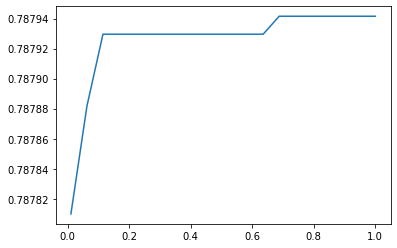

In [56]:
c_1 = np.linspace(0.01,1,20)
c_2 = np.linspace(0.01,0.2,20)

score = []
for i in c_1:
    lr = LR(solver='liblinear',C=i).fit(X,y)
    score.append(lr.score(vali_X,vali_y))

plt.figure()
plt.plot(c_1,score)
plt.show()

In [57]:
lr.n_iter_

array([5], dtype=int32)

D:\22Anaconda\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
D:\22Anaconda\lib\site-packages\sklearn\utils\validation.py:63: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  return f(*args, **kwargs)
D:\22Anaconda\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
D:\22Anaconda\lib\site-packages\sklearn\utils\validation.py:63: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your

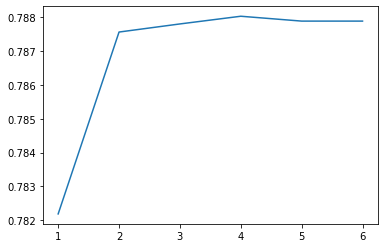

In [58]:
score = []
for i in [1,2,3,4,5,6]:
    lr = LR(solver='liblinear',C=0.025,max_iter=i).fit(X,y)
    score.append(lr.score(vali_X,vali_y))
plt.figure()
plt.plot([1,2,3,4,5,6],score)
plt.show()

综上，调C和max_iter的意义不大。看一下ROC曲线上的结果。

D:\22Anaconda\lib\site-packages\sklearn\utils\validation.py:63: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  return f(*args, **kwargs)


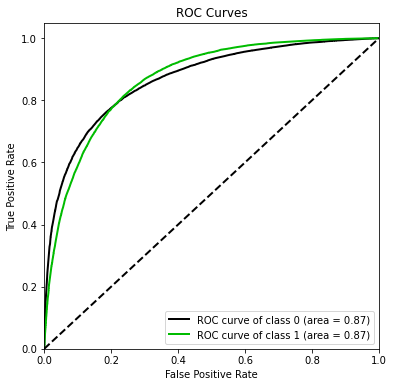

In [59]:
vali_proba_df = pd.DataFrame(lr.predict_proba(vali_X))
skplt.metrics.plot_roc(vali_y, vali_proba_df,
                       plot_micro=False,figsize=(6,6),
                       plot_macro=False)

用来验证模型预测和捕捉少数类的效果。纵轴是召回率，横轴是1-特异度，该曲线反映的是模型在捕捉少数类的时候，随着对少数类捕捉的水准越来越高，模型判断错误多少类的可能性有多大。虚线代表每当对少数类捕捉出一个，就要判错一个多少类。ROC曲线越靠**左上方**越好，也就是AUC面积越大越好。

## 六、制作评分卡

评分卡中的分数，由公式Score = A-B\*log(odds)计算，其中A与B是常数，A叫做“补偿”，B叫做“刻度”，log(odds)代表了一个人违约的可能性，就是参数。两个常数可以通过两个假设的分值带入公式求出，这两个假设分别是：（1）某个特定的违约概率下的预期分值；（2）指定的违约概率翻倍的分数（PDO）。

例如，假设对数几率为1/60时设定的特定分数为600，PDO=20，那么对数几率为1/30时的分数就是620。带入以上线性表达式，可以得到：

In [60]:
B = 20/np.log(2)
A = 600 + B*np.log(1/60)
B,A

(28.85390081777927, 481.8621880878296)

有了A和B，分数就很容易得到了。其中不受评分卡中各特征影响的基础分，就是将截距作为log(odds)带入公式进行计算，而其他各个特征各个分档的分数，也是将系数带入进行计算：

In [61]:
base_score = A - B*lr.intercept_
base_score

array([482.01389716])

In [62]:
score_age = woeall["借款人借款年龄"] * (-B*lr.coef_[0][1]) #借款人借款年龄是第2个特征（索引1）
score_age

cut
(-inf, 36.0]    -4.148688
(36.0, 54.0]    -2.225320
(54.0, 61.0]     1.968310
(61.0, 74.0]     8.033416
(74.0, inf]     13.717361
dtype: float64

可以通过循环，将所有特征的评分卡内容全部一次性写往一个本地文件02ScoreData.csv。

In [63]:
file = "02ScoreData.csv"
'''
open是用来打开文件的python命令，第一个参数是文件的路径+文件名，第二个参数是打开文件后的用途，"w"表示用于写入，"r"表示打开阅读
首先写入基准分数，之后使用循环，每次生成一组score_age类似的分档和分数，不断写入文件之中

'''
with open(file,"w",encoding='utf-8-sig') as fdata: #文件存在则打开，文件不存在则新建打开
    fdata.write("base_score,{}\n".format(base_score))

for i,col in enumerate(X.columns):
    score = woeall[col] * (-B*lr.coef_[0][i])
    score.name = "Score"
    score.index.name = col
    score.to_csv(file,header=True,mode='a')